# Rapport de projet : la parallaxe de Mars


#### BONACCHI Jérôme, KUNIMOTO Yakumo, KUS Ferhat, RAMILISON Mickael

___

## Sommaire

### Introduction


### 1. Compréhension et caractéristiques du mouvement du système Soleil, Terre et Mars 
     
> #### A. Mouvement des astres dans le Système solaire
        
> #### B. Méthodes de détection du mouvement des planètes dans le ciel 

     
### 2. Interprétations de la parallaxe de Mars  
     
> #### A. Parallaxe de Mars : principe de la méthode et intérêt astronomique

> #### B. Mouvement de Mars dans le référentiel géocentrique
     
     
### 3. Analyse des observations, modélisations et simulations des systèmes

> #### A. Reproduction ou interprétation des observations par une simulation informatique

> #### B. Vérification de la distance Terre-Mars grâce au calcul de la parallaxe


### Conclusion 

### Sources

### Annexe : Les mouvements rétrogrades des autres planètes du Système solaire

___

## Introduction

Tout d’abord, pour notre projet d’ARE, nous nous sommes mis ensemble car nous avons de bonnes affinités et nous nous connaissions déjà du semestre 1. De plus, nous avons un intérêt commun pour la physique et l'informatique. En effet, Mickael et Ferhat préfèrent la physique, alors que Yakumo et Jérôme préfèrent l'informatique. Le mouvement rétrograde de Mars et la séance de kinesthésie sur le même sujet nous ont intrigués, c'est pourquoi nous avons choisi d’étudier la parallaxe de Mars. Comme nous avions déjà nos préférences sur la physique et l’informatique, la répartition des tâches n’a pas été difficile. Cependant, la première semaine nous devions majoritairement nous concentrer sur l’aspect physique afin de comprendre le sujet et surtout de mieux le modéliser par la suite. La seconde semaine, nous nous sommes donc plus concentrés sur le code. La difficulté majeure était de se voir en dehors des séances d’ARE le mercredi matin. En effet, nous ne sommes pas tous dans le même groupe et nous n’étions pas forcément tous libre au même moment durant la semaine. Nous avons donc créé un groupe sur les réseaux sociaux afin de se tenir au courant de nos recherches, de nos idées nouvelles sur le sujet et de l’avancement des codes informatiques. 
___

## 1. Compréhension et caractéristiques du mouvement du système Soleil, Terre et Mars

### A. Mouvement des astres dans le système solaire

Tout d'abord étudions le mouvement de la Terre dans le Système solaire.  

La Terre tourne autour du Soleil selon une trajectoire elliptique, et sur elle-même. Ce sont ces deux mouvements qui permettent l'alternance du jour et de la nuit, ainsi que l'existence des saisons.
La rotation de la Terre sur elle-même se fait autour de l'axe Nord-Sud. Cela créer le mouvement apparent de rotation des astres dans le ciel autour d'un pôle céleste, c'est le mouvement diurne. La Terre effectue un tour complet sur elle-même en 23 heures et 56 minutes. Cette rotation se fait d'Ouest en Est et entraîne le lever du Soleil à l'Est et le coucher vers l'Ouest des astres. Les astres dans notre ciel semblent donc tourner d'Est en Ouest et décrivent des cercles autour du pôle céleste. Les cercles sont d'autant plus grands que les astres sont éloignés du pôle.

La Terre décrit un tour autour du Soleil en 1 an, soit 365,25 jours, dans un plan appelé écliptique. Pendant cette révolution, l'axe de rotation de la Terre reste incliné de 23.5° par rapport au plan de l'écliptique.

On cherche dans notre projet à comprendre le mouvement du Système Soleil, Terre et Mars. Nous avons décidé d'effectuer une  modélisation du Système solaire en considérant que le centre de masse du Système solaire est le Soleil car en réalité il est situé à l'intérieur du Soleil. C'est donc une approximation réaliste du Système solaire. 

Enfin, les planètes décrivent des orbites elliptique autour du Soleil, dans le même sens et "presque" dans le même plan (voir la figure n°1), ces mouvements sont décrits par les lois de Kepler et de Newton. 


![plan systeme solaire](https://media4.obspm.fr/public/AMC/pages_definition-systeme-solaire/images_intro/orbites-planetes.jpg)
- _Figure 1 : Les orbites des planètes du Système solaire dans leur plan de révolution._ (Source : [Observatoire de Paris](https://media4.obspm.fr/public/AMC/pages_definition-systeme-solaire/images_intro/orbites-planetes.jpg))

Pour nos programmes nous avons eu besoin des équations suivantes.

En prenant $a$ le demi-grand axe, $b$ le demi-petit axe, $c$ la distance entre l'un des foyers et le centre de l'ellipse et $ \omega = \frac{2 \pi}{T} $ la fréquence  : 

Equations paramétriques d'un cercle dont le centre est l'origine du repère :

$ \begin{cases} x = a \cos ( \omega t) \\ y = a \sin ( \omega t) \end{cases}\quad t \in \mathbb{R} $

Equations paramétriques d'une ellipse dont le centre est l'origine du repère : 

$ \begin{cases} x = a \cos ( \omega t) \\ y = b \sin ( \omega t) \end{cases}\quad t \in \mathbb{R} $

Par ailleurs :

$b = \sqrt{a^2- c^2} = \sqrt{a^2 - (e \cdot a)^2} = \sqrt{a^2(1 - e^2)} = a \sqrt{1 - e^2}$

On obtient alors : 

$ \begin{cases} x = a \cos ( \omega t) \\ y = a \sqrt{1 - e^2} \sin ( \omega t) \end{cases}\quad t \in \mathbb{R} $

In [1]:
# Orbites des planètes du Système solaire
import numpy as np
import matplotlib.pyplot as plt
    
SS = [
    ("Mercure", 4.87946e6, 0.38709831, 87.9693, 0.205630, 'grey'),
    ("Venus", 1.21036e7, 0.72332981, 224.701,0.006772, 'y'),
    ("La Terre", 1.27562e7, 1, 365.256, 0.0167086, 'blue'),
    ("Mars", 6.7924e6, 1.5236794, 686.986, 0.0934, 'red'),
    ("Jupiter", 1.42984e8, 5.2026028, 4332.656, 0.048498, 'maroon'),
    ("Saturn", 1.20596e8, 9.5549087, 10759.404, 0.05555, 'orange'),
    ("Uranus", 5.1118e7, 19.2184487, 30688.984, 0.046381, 'cyan'),
    ("Neptune", 4.9528e7, 30.1103885, 58707.284, 0.009456, 'blue')
]

def theta(T):
        return 2*np.pi*np.linspace(0, T, 1000)/T

# Trace les orbites des planètes si L est une liste de la forme :
#(Nom, Diamètre en mètres, Demi-grand axe en UA, Période de révolution sidérale en jours, Excentricité, Couleur)
#(n,d,a,T,e,c)

def orbites(L, legende):

    fig_orbites = plt.figure()
    Soleil = plt.Circle((0,0), 0.25, fc='yellow', color = 'orange', label='Le Soleil')
    plt.gca().add_patch(Soleil)
    
    #orbites censées être elliptiques
    Coord_X = [a*np.cos(theta(T)) for (n,d,a,T,e,c) in L]
    Coord_Y = [a*np.sqrt(1 - e**2)*np.sin(theta(T)) for (n,d,a,T,e,c) in L]
    
    for (x,y,(n,d,a,T,e,c)) in zip(Coord_X, Coord_Y, L):
        plt.plot(x, y, color = c, linewidth = 2, linestyle = '-', label = n) 

    plt.title(legende)
    plt.legend(loc="upper right") 
    plt.xlabel('Distance en UA')
    plt.ylabel('Distance en UA')
    #plt.xticks([-60,-50,-40,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,40,50,60])
    plt.axis('equal')
    return plt.show()

In [2]:
orbites(SS, 'Le Système solaire')
orbites(SS[:4], 'Le Système solaire interne')

- _Figure 2 : Les orbites des planètes du Système solaire._

> Le Système solaire est composé (par ordre croissant d'éloignement au Soleil) de Mercure, Venus, la Terre, Mars, Jupiter, Saturne, Uranus et Neptune.

- _Figure 3 : Les orbites des planètes du Système solaire interne._

> Le Système solaire interne contient uniquement les quatre premières planètes.

Les figures 2 et 3 affichent des orbites elliptiques bien que cela ne se voie pas clairement.

Après réflexion avec nos professeurs, nous avons décidé d’approximer que l’excentricité des orbites elliptiques de la Terre et de Mars est égale à 0. En effet, $e_{Terre}=0.01$ et $e_{Mars}=0.09$, ces valeurs sont inférieures à 0.1 soit à un dixième de l'excentricité maximale pour une ellipse. De plus, nous avons pensé que nous ne pourrions pas voir la différence entre l'orbite elliptique de faible excentricité et une orbite circulaire sur une animation. Enfin, si nous avons choisi de faire cette approximation c'est parce que la vitesse des planètes reste ainsi constante. En effet, nous ne savons pas faire varier la vitesse des planètes. De plus, nous n'avons pas respecté les proportions des tailles des planètes et du Soleil par rapport à l'échelle car sinon elles seraient trop petites pour les distinguer. Finalement, la taille des orbites, la vitesse, et la période de révolution des planètes sont les caractéristiques qui ont été respectées sur les animations du système Soleil-Terre-Mars.

In [7]:
# Animation des planètes du Système solaire interne

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

SS = [
    ("Mercure", 4.87946e6, 0.38709831, 87.9693, 0.205630, 'grey'),
    ("Venus", 1.21036e7, 0.72332981, 224.701,0.006772, 'y'),
    ("La Terre", 1.27562e7, 1, 365.256, 0.0167086, 'blue'),
    ("Mars", 6.7924e6, 1.5236794, 686.986, 0.0934, 'red'),
    ("Jupiter", 1.42984e8, 5.2026028, 4332.656, 0.048498, 'maroon'),
    ("Saturn", 1.20596e8, 9.5549087, 10759.404, 0.05555, 'orange'),
    ("Uranus", 5.1118e7, 19.2184487, 30688.984, 0.046381, 'cyan'),
    ("Neptune", 4.9528e7, 30.1103885, 58707.284, 0.009456, 'blue')
]

fig_anim_SS, ax = plt.subplots()

#orbites circulaires
Coord2_X = [a*np.cos(theta(T)) for (n,d,a,T,e,c) in SS[:4]]
Coord2_Y = [a*np.sin(theta(T)) for (n,d,a,T,e,c) in SS[:4]]

for (x,y,(n,d,a,T,e,c)) in zip(Coord2_X, Coord2_Y,SS[:4]):
    plt.plot(x, y, color = c, linewidth = 3, linestyle = ':') 

#diametres pas a l'echelle,*10^-8 m
Soleil = plt.Circle((0,0), 0.25, fc='yellow', color = 'orange', label='Le Soleil')
Mercure = plt.Circle((0, 0), 4.87946/100, fc='grey', label = 'Mercure')
Venus = plt.Circle((0, 0), 1.21036/10, fc='y', label = 'Venus')
Terre = plt.Circle((0, 0), 1.27562/10, fc='blue', label = 'La Terre')
Mars = plt.Circle((0, 0), 6.7924/100, fc='red', label = 'Mars')

def init_SS():
    Mercure.center = (0, 0)
    Venus.center = (0, 0)
    Terre.center = (0, 0)
    Mars.center = (0, 0)
    Soleil.center = (0,0)
    ax.add_patch(Mercure)
    ax.add_patch(Venus)
    ax.add_patch(Terre)
    ax.add_patch(Mars)
    ax.add_patch(Soleil)
    return Soleil, Mercure, Venus, Terre, Mars,

#vitesses angulaires pas a l'echelle,x55 ?
def animate_SS(i):
    x_Mercure, y_Mercure = Mercure.center
    x_Mercure = 0.38709831 * np.sin(np.radians(i)*110*np.pi/87.9693)
    y_Mercure = 0.38709831 * np.cos(np.radians(i)*110*np.pi/87.9693)
    Mercure.center = (x_Mercure, y_Mercure)
    x_Venus, y_Venus = Venus.center
    x_Venus = 0.72332981 * np.sin(np.radians(i)*110*np.pi/224.701)
    y_Venus = 0.72332981 * np.cos(np.radians(i)*110*np.pi/224.701)
    Venus.center = (x_Venus, y_Venus)
    x_Terre, y_Terre = Terre.center
    x_Terre = 1 * np.sin(np.radians(i)*110*np.pi/365.256)
    y_Terre = 1 * np.cos(np.radians(i)*110*np.pi/365.256)
    Terre.center = (x_Terre, y_Terre)
    x_Mars, y_Mars = Mars.center
    x_Mars = 1.5236794 * np.sin(np.radians(i)*110*np.pi/686.986)
    y_Mars = 1.5236794 * np.cos(np.radians(i)*110*np.pi/686.986)
    Mars.center = (x_Mars, y_Mars)
    return Mercure, Venus, Terre, Mars,

anim_SS = animation.FuncAnimation(fig_anim_SS, animate_SS, 
                               init_func=init_SS, 
                               frames=3080, 
                               interval=10,
                               blit=True)

plt.title('Animation du Système solaire interne')
plt.legend(loc='upper right')
plt.xlabel("Distance en UA")
plt.ylabel("Distance en UA")
plt.axis('equal')
#anim.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

- _Figure 4 : Animation du Système solaire interne._

> La vitesse des planètes a été grandement augmentée afin de mieux visualiser l'animation et le déplacement de chaque corps céleste sur sa trajectoire.

### B. Méthodes de détection du mouvement des planètes dans le ciel

A l'œil nu, il est possible de voir les planètes à l'aide d'un télescope. Un télescope est un instrument d'optique permettant d'augmenter la luminosité ainsi que la taille apparente des objets à observer. Son rôle de récepteur de lumière est souvent plus important que son grossissement optique, il permet d'apercevoir des objets célestes ponctuels difficilement perceptibles ou invisibles à l'œil nu. Son oculaire peut être de différentes tailles, plus l'oculaire est de grande taille plus le télescope est performant et permet de voir des détails.  

On peut sans problème observer quelques planètes en pleine ville, car elles sont suffisamment brillantes pour ne pas être affectées par la luminosité du ciel. Le plus important est de les observer lors de l'absence de turbulences atmosphériques, car les planètes nécessitent un fort grossissement. La moindre turbulence brouille l’image et les fins détails ne sont plus perceptibles.

Pour différencier les planètes des étoiles on remarque que :

- Les planètes ne scintillent pas comme les étoiles
- Elles présentent un disque sensible dans une lunette, tandis qu'une étoile n'est qu'un petit point.
- De jour en jour elles se déplacent contrairement aux étoiles

Mars est assez lumineuse pour être toujours visible à l'œil nu avec sa magnitude de 1,80 à -2,80. La magnitude est l'unité de mesure de la luminosité et la brillance d'un astre. Grâce à un télescope avec un oculaire de 50 mm on verra le disque de la planète, et avec un objectif de 60 mm (grossissement de 100 fois) on peut voir la calotte polaire. Son évolution est visible à partir d'un instrument de 100 mm. Avec un télescope de 100 à 200 mm on peut noter des variations dans l'intensité générale des taches. Les planètes brillent parce qu'elles renvoient la lumière du Soleil et parfois on peut en voir qu'une partie, comme la Lune par exemple.

De jour en jour elles peuvent se déplacer contrairement aux mouvements des étoiles : il s’agit du mouvement rétrograde. Pour observer le mouvement des planètes on peut déterminer leurs positions à plusieurs instants afin d’obtenir leurs trajectoires. Pour positionner les planètes dans le ciel, il y a plusieurs méthodes pour déterminer leurs coordonnées à un instant t, il y a les coordonnées azimutales, les coordonnées équatoriales, horaires, écliptiques etc… On peut ainsi observer les trajectoires des planètes dans le ciel et nous allons donc expliquer le mouvement rétrograde de Mars dans notre ciel, à travers plusieurs animations.
___

## 2. Interprétations de la parallaxe de Mars

### A. Parallaxe de Mars : principe de la méthode et intérêt astronomique

Commençons par définir quelques termes de notre projet :

Premièrement, la parallaxe est l’angle sous lequel on pourrait voir une longueur connue, depuis un astre quelconque. On distingue généralement deux types de parallaxe : la parallaxe diurne et la parallaxe annuelle.

La parallaxe diurne est utilisée pour les objets du Système solaire : c’est l’angle sous lequel on voit, depuis l’un d’entre eux, le rayon terrestre.

La parallaxe annuelle est utilisée pour les étoiles (proches) : c’est l’angle sous lequel on voit le demi-grand axe de l’orbite terrestre depuis une étoile.


La parallaxe permet d'obtenir et de déterminer la distance d'un objet éloigné sans avoir à y aller. On s'intéresse dans notre projet au cas de la parallaxe diurne. Pour obtenir cette parallaxe il suffit de faire deux observations simultanées à partir de deux lieux éloignés sur la surface de la Terre et il faut pouvoir mesurer des angles avec suffisamment de précision. La parallaxe correspond donc à un angle très petit qui s’exprime en secondes d’arc, noté ("). 

Pour connaitre et représenter la parallaxe de Mars regardons le programme ci-dessous pour mieux comprendre cette notion. 
On commence par choisir deux positions différentes à la surface de la Terre, $A1$ et $A2$ que l'on relie directement au centre de Mars. A partir de deux droites $OtA1$ et $OtA2$ définissant respectivement les demi-droites $B1$ et $B2$ (projection sur un fond d'image céleste contenant des étoiles lointaines que l'on considère comme étant fixes), on peut représenter cette parallaxe avec d'un côté l'angle formé entre les droites $A1Om$ et $B1$ et d'un autre côté l'angle formé entre $A2Om$ et $B2$. Ce dernier angle s'agit d'un cas particulier de la parallaxe qu'on appelle parallaxe horizontale. Cette appelation vient du fait que l'on voit le rayon terrestre depuis Mars.
Ainsi, la perception de la planète Mars n'est pas la même suivant le point sur Terre depuis lequel on observe Mars. C'est ce phénomène ou effet qui est appelé parallaxe.
Cette dernière méthode permet également de connaître à partir de la troisième loi de Kepler toutes les longueurs à l'intérieur du Système solaire. C'est donc une méthode extrêmement puissante.

In [ ]:
import numpy as np
from math import *
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib import animation

#On définit les limites de notre schéma donc du repère, on donne un titre.
ax = plt.axes(xlim=(0, 50), ylim=(0, 40))
ax.set_title("Systeme Terre-Mars", va='bottom')  

#On établit deux fonctions permettant d'obtenir les deux planètes: 
#Terre et Mars. Les deux fonctions dépend de leur rayon 
#(supposé ici constante car orbite circulaire)
def Mars(RayonM): 
    Mars=plt.Circle((45, 15), RayonM, fc='red')
    return plt.gca().add_patch(Mars)

def Terre(RayonT):               
    Terre= plt.Circle((15, 20), RayonT, fc='blue')
    return plt.gca().add_patch(Terre)    


Terre(5)  #Les valeurs des rayons des deux planètes peuvent être calculés 
Mars(3)   #plus tard en Unité Astronomique (UA).

#On n'oublie surtout pas de tracer le segment reliant le centre de la
#Terre au centre de Masse que l'on appele "Distance T-M"
plt.annotate("Terre", xy = (8, 26), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Mars", xy = (40, 8), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Distance T-M", xy = (16, 14), xytext = (15, 15), textcoords = 'offset points')



#On crée un segment qui relie le point A1 au point Om(Origine de Mars)
x1, y1 = [19.75,45],[21,15]   #Coordonnés du segment A1P

#De même on peut créer un segment qui lie les deux points A2 et Om
x2, y2 = [15, 45], [15, 15]   #Coordonnés du segment A2P


plt.annotate("A1", xy = (20, 23), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("A2", xy = (13, 13), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Ot", xy = (14, 21), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Om", xy = (45, 16.5), xytext = (0, 0), textcoords = 'offset points')


#On crée maintenant le segment qui relie le centre de la Terre au centre de Mars
X=[15,45]  #Coordonnée des valeurs en x (abscisse) de la distance Terre-Mars
Y=[20,15]  #Coordonnée des valeurs en y (ordonné) de la distance Terre-Mars

#On aura besoin de tracer le rayon de la Terre dans le cas du Parallaxe Diurne
x_rayonTerre=[10,15]         # Traçage du rayon de la Terre en x
y_rayonTerre=[20,20]         # Traçage du rayon de la Terre en y 

plt.annotate("RayonT", xy= (3, 20), xytext = (0, 0), textcoords = 'offset points')

#On trace maintenant la droite entre le point A1 et Ot (Origine Terre)
demi_droite_B1x=[15,50]      #Coordonnées B1 en x 
demi_droite_B1y=[20,27]       #Coordonnées B1 en y

#De même, on trace la droite reliant le point A2 et Ot
demi_droite_B2x=[15,15]    #Coordonnées B2 en x
demi_droite_B2y=[0,20]      #Coordonnées B2 en y

plt.annotate("B1", xy= (44, 26), xytext = (15, 15), textcoords = 'offset points')
plt.annotate("B2", xy= (10, 3), xytext = (15, 15), textcoords = 'offset points')


#Mode de Représentation et d'affichage de toutes les données
plt.plot(x1, y1,x2,y2,marker = 'o')   #On représente les points A1 et A2
plt.plot(x_rayonTerre,y_rayonTerre,'--')      #On représente le rayon de la Terre
plt.plot(X,Y,'------')                #On représente la distance entre Centre Terre et Centre Mars
                                      

plt.plot(demi_droite_B1x,demi_droite_B1y)
plt.plot(demi_droite_B2x,demi_droite_B2y)

#plt.savefig('Kus Travail Parallaxe.png')
plt.show()

### B. Mouvement de Mars dans le référentiel géocentrique

Pendant la séance de kinesthésie nous avons modélisé ce mouvement rétrograde de Mars à l’aide d’une corde qui représente la droite qui relie les centres de la Terre et de Mars. Lorsque l'on projette la position de Mars par rapport à la Terre sur le ciel étoilé, on observe bien que Mars suit dans un premier temps le mouvement des étoiles, c'est à dire d’Ouest en Est, puis repart dans l’autre sens, il s’agit donc d’un mouvement rétrograde, avant d’enfin repartir d'Ouest en Est, il s’agit du mouvement prograde. 
Ce mouvement rétrograde se reproduit environ tous les 780 jours et dure en moyenne 72 jours. Cela est dû au fait que la Terre et Mars orbitent toutes les deux autour du Soleil. Les deux planètes sont comparables à une course entre deux voitures sur des couloirs différents, la Terre étant dans le couloir intérieur et la Terre se déplace plus vite que Mars. Tous les 26 mois, la Terre arrive par derrière pour dépasser Mars. Lorsque l'on dépasse Mars on a l'illusion que la planète revient en arrière.
On peut donc noter les positions de Mars, durant ce phénomène, dans le ciel en fonction du temps pour obtenir sa trajectoire :


![trajectoires Mars](http://mars.jpl.nasa.gov/images/mep/allaboutmars/retrograde/2014-2016-mars-retrograde-earth-night-sky-samples.jpg)
- _Figure 5 : Les observations du mouvement rétrograde de Mars des années 2014 et 2016._ (Source : [National Aeronautics and Space Administration](http://mars.jpl.nasa.gov/images/mep/allaboutmars/retrograde/2014-2016-mars-retrograde-earth-night-sky-samples.jpg))

> A gauche, nous avons la trajectoire de Mars en 2014 et à droite la trajectoire de Mars en 2016 (vu depuis Pasadena, États-Unis) obtenues à partir des sites d'observations exclusives à la NASA.


En effet, comme le plan des orbites des deux planètes ne sont pas les mêmes (voir la figure 5) la trajectoire de Mars dans le ciel peut varier comme le montre l'image ci-dessous :

![alt text](http://mars.jpl.nasa.gov/images/mep/allaboutmars/nightsky/earth-mars-tilt_br.gif)
- _Figure 6: Les orbites de la Terre et de Mars dans deux plans différents._ (Source : [National Aeronautics and Space Administration](https://mars.jpl.nasa.gov/allaboutmars/nightsky/retrograde/))


## 3. Analyse des observations, modélisations et simulations des systèmes

### A. Reproduction ou interprétation des observations par une simulation informatique

In [ ]:
#Projection de Mars sur une droite
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
vTerre=2
vMars=1
dTerre=1
dMars=1.5236794
d3=10

#Animation
fig1 = plt.figure()
fig1.set_dpi(100)
fig1.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
b=12
T=False

def init1():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Terre.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    return Terre, Mars, line

def animate1(i):
    global b,T
    x, y = Terre.center
    x = 0 - dTerre * np.sin(np.radians(i)*vTerre)
    y = 0 + dTerre * np.cos(np.radians(i)*vTerre)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 - dMars * np.sin(np.radians(i)*vMars)
    w = 0 + dMars * np.cos(np.radians(i)*vMars)
    Mars.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(dTerre*dMars))<=(math.pi)/2 and T==True:
        if (b-dTerre * np.cos(np.radians(i+5)*vTerre)-dTerre * np.sin(np.radians(i+5)*vTerre)*(dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))/((dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))-a>-0.5:
            b=b-0.03
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
        plt.plot(a,b, marker='.')

    elif math.acos((x*v+w*y)/(dTerre*dMars))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return Terre, Mars, line

anim1 = animation.FuncAnimation(fig1, animate1, 
                               init_func=init1, 
                               frames=360, 
                               interval=10,
                               blit=True)


#Cercles
OTerre=plt.Circle((0, 0), dTerre, fc='none', color='b', label='OTerre', linestyle='dashed')
OMars=plt.Circle((0, 0), dMars, fc='none', color='r', label='OMars', linestyle='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='orange', color='yellow',label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)



#Finitions
pylab.title('Système Soleil-Terre-Mars')
plt.legend(loc='upper left', handles=[Terre, Mars ,line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
plt.axis('equal')
ylim(-3,12.6)
xlim(-11,11)
plt.show()

- _Figure 7 : Projection de Mars sur une droite._

> Dans ce programme nous avons approximé que Mars a une période de révolution de 2 ans, c'est-à-dire lorsque Mars aura fait un tour, la Terre aura fait 2 tours. L'intérêt est que la parallaxe reste toujours au même endroit, en haut sur une droite horizontale. Les images de Mars par rapport à la Terre forment un "S" de sorte que les points ne restent pas sur le même plan afin d'observer le mouvement rétrograde.

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


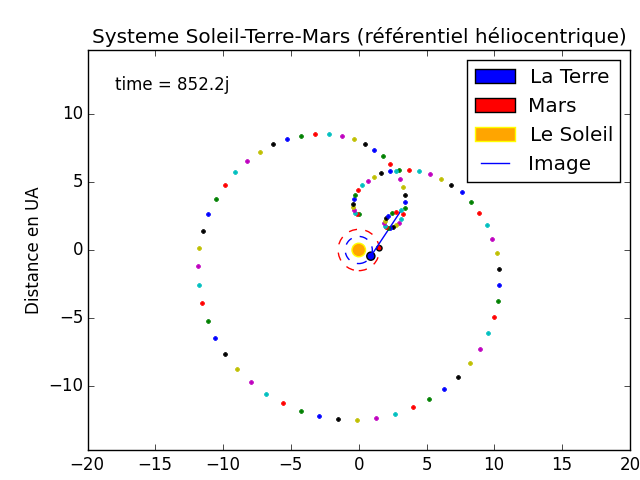

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1
d2=1.5236794
d3=5

#Animation
fig2 = plt.figure()
fig2.set_dpi(100)
fig2.set_size_inches(7,5)

ax = plt.axes(xlim=(-7, 7), ylim=(-7, 7))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
k=0

def init2():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    time_text.set_text('')
    return Terre, Mars, line,time_text

def animate2(i):
    global k
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (v, w)
    a=d3*(v-x)
    b=d3*(w-y)
    if i%3==0:
        plt.plot(a,b, marker='.')
    line.set_data([x,a],[y,b])
    k=k+1
    if math.floor(1000*math.sqrt((x-v)**2+(y-w)**2))==800:
        k=1
    time_text.set_text(time_template % (k*dt))
    return Terre, Mars, line, time_text





anim2 = animation.FuncAnimation(fig2, animate2, 
                               init_func=init2, 
                               frames=36000000, 
                               interval=100,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed')
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='orange', color='yellow',label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Systeme Soleil-Terre-Mars (référentiel héliocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil, line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
xlim(-20,20)
ylim(-15,15)
plt.show()

- _Figure 8 : Projection de Mars par rapport à la Terre dans le référentiel héliocentrique._

> Dans ce deuxième programme, nous sommes toujours dans le référentiel héliocentrique. Nous avons tracé le mouvement des images de Mars par rapport à la Terre grâce à une droite de longueur proportionnelle à la distance Terre-Mars. Cela forme une cardioïde (ouverte).
Nous pouvons constater que tous les 779 jours environ, le temps se réinitialise et il se forme une nouvelle boucle: c'est la période synodique (779.95 jours).

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


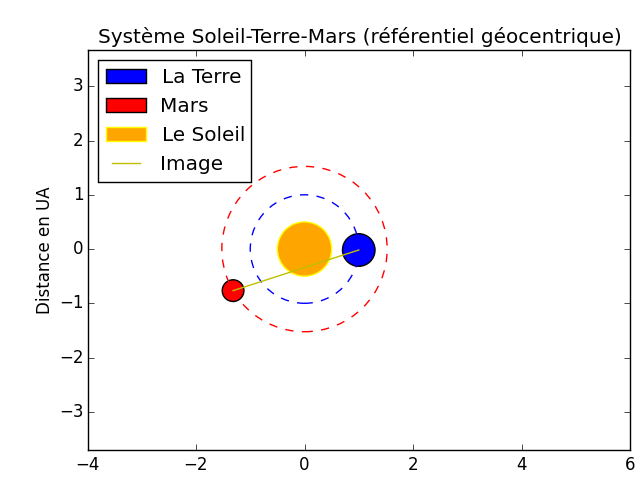

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=1
v2=365.25/686.96
d1=1
d2=1.5236794
d3=5

#Animation
fig3 = plt.figure()
fig3.set_dpi(100)
fig3.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image',c='y') 

def init3():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    return Terre, Mars, line

def animate3(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (v, w)
    ax.set_xlim(-5+x,5+x)
    ax.set_ylim(-5+y,5+y)
    line.set_data([x,v],[y,w])
    return Terre, Mars, line

anim3 = animation.FuncAnimation(fig3, animate3, 
                               init_func=init3, 
                               frames=36000000, 
                               interval=10,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed')
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='orange', color='yellow',label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Système Soleil-Terre-Mars (référentiel géocentrique)')
plt.legend(loc='upper left', handles=[Terre, Mars, Soleil, line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
plt.show()

- _Figure 9 : Mouvement du système Soleil-Terre-Mars dans le référentiel géocentrique._

> Dans ce troisième programme, nous sommes dans le référentiel géocentrique. Le Soleil reste positionné au point (0,0) et la Terre garde toujours sa position absolue sur l'animation. Ainsi, les axes se "décalent" et le Soleil suit une trajectoire circulaire uniforme.

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


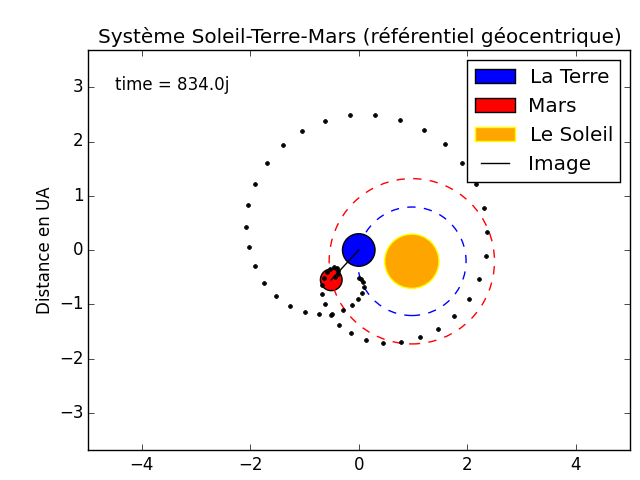

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1
d2=1.5236794

#Animation
fig4 = plt.figure()
fig4.set_dpi(100)
fig4.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((0, 0), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
Soleil=plt.Circle((5, -5), 0.5, fc='orange', color='yellow',label='Le Soleil')
OTerre=plt.Circle((0, 0), radius=d1, fc='none', color="blue", ls='dashed')
OMars=plt.Circle((0, 0), radius=d2, fc='none', color="r", ls='dashed')
line, = plot([],[], label='Image',c='black')

dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init4():
    OTerre.center = (5, 5)
    ax.add_patch(OTerre)
    Soleil.center = (5, 5)
    ax.add_patch(Soleil)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    OMars.center = (5, 5)
    ax.add_patch(OMars)
    Terre.center= (0,0)
    ax.add_patch(Terre)
    time_text.set_text('')
    return Mars, Soleil, OTerre, OMars, line, time_text

def animate4(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    OTerre.center = (x, y)
    Soleil.center = (x, y)
    OMars.center = (x,y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (x-v, y-w)
    line.set_data([0,x-v],[0,y-w])
    if i%5==0:
        plt.plot(x-v,y-w, marker='.',color='black')
    time_text.set_text(time_template % (i*dt))
    return Mars, Soleil, OTerre, OMars, line, time_text

anim4 = animation.FuncAnimation(fig4, animate4, 
                               init_func=init4, 
                               frames=3600, 
                               interval=100,
                               blit=True)

#Finitions
pylab.title('Système Soleil-Terre-Mars (référentiel géocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil, line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
xlim(-5,5)
ylim(-5,5)
plt.show()

- _Figure 10 : Projection de Mars par rapport à la Terre dans le référentiel géocentrique._

> Dans ce dernier programme, toujours dans le référentiel de la Terre, nous avons tracé les positions de Mars avec des points. Cela forme encore une fois une cardioïde (ouverte). On retrouve également la période synodique. Chaque boucle représente une parallaxe de Mars. Mais avec ces animations, des limites s'imposent. Les orbites de la Terre et de Mars sont sur le même plan, nous avons négligé les trajectoires elliptiques donc la variation des vitesses. Ces contraintes nous empêchent donc, par exemple, de projeter l'image de Mars dans le ciel de la Terre et de simuler la parallaxe dans un plan avec des étoiles lointaines fixes. Ces animations mettent en évidence que la parallaxe est un phénomène périodique qui dépend du demi-grand-axe des deux orbites et des vitesses des planètes.

### B. Vérification de la distance Terre-Mars grâce au calcul de la parallaxe

<IPython.core.display.Javascript object>


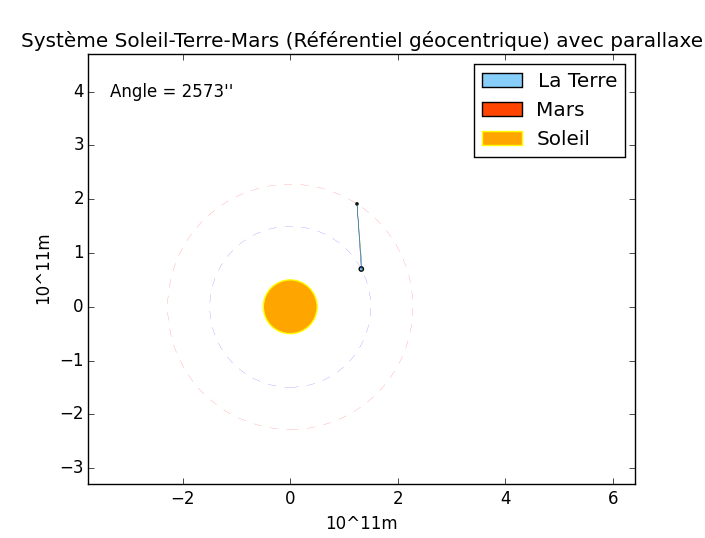

In [2]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=1
v2=365.25/686.96
d1=1.495978875
d2=2.27936637

#Animation
fig3 = plt.figure()
fig3.set_dpi(100)
fig3.set_size_inches(7, 7)

ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))

Terre = plt.Circle((5, -5), 0.04, fc='lightskyblue', label='La Terre')
Mars = plt.Circle((5, -5), 0.02, fc='orangered',label='Mars')
line, = plot([],[], label='Image',c='black',linewidth=0.3)
line2, = plot([],[], label='Image',c='black' , linewidth=0.3) 

angle_text = ax.text(0.04, 0.9, '', transform=ax.transAxes)

T=True


def init3():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    line2.set_data([],[])
    angle_text.set_text('')
    return Terre, Mars, line, line2, angle_text 

def animate3(i):
    global T
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i/3)*v1)
    y = 0 + d1 * np.cos(np.radians(i/3)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i/3)*v2)
    w = 0 + d2 * np.cos(np.radians(i/3)*v2)
    Mars.center = (v, w)
    a = 0 + d1 * np.sin(np.radians(i/3+1.5)*v1)
    b = 0 + d1 * np.cos(np.radians(i/3+1.5)*v1)
    ax.set_xlim(-4+x,4+x)
    ax.set_ylim(-4+y,4+y)
    line.set_data([x,v],[y,w])
    line2.set_data([a,v],[b,w])
    c=np.degrees(math.acos(((x-v)*(a-v)+(y-w)*(b-w))/(math.sqrt((x-v)**2+(y-w)**2)*math.sqrt((a-v)**2+(b-w)**2))))
    if (x-v)**2+(y-w)**2<2.27936637**2-1.495978875**2:
        angle_text.set_text("Angle = %.0f''" % (3600*c))
    else:
        angle_text.set_text("Angle = %.0f''" % (-3600*c))
    return Terre, Mars, line, line2, angle_text


anim3 = animation.FuncAnimation(fig3, animate3, 
                               init_func=init3, 
                               frames=36000000, 
                               interval=10,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed',linewidth=0.1)
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed',linewidth=0.1)
Soleil=plt.Circle((0, 0), 0.5, fc='orange', color='yellow', label='Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Système Soleil-Terre-Mars (Référentiel géocentrique) avec parallaxe')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil])
pylab.xlabel('10^11m')
pylab.ylabel('10^11m')
axis('equal')
plt.show()

Nous pouvons remarquer que lorsque nous avons la configuration Soleil-Terre-Mars avec les 3 objets alignés, l'angle formé est au maximum. De plus, il se forme un triangle rectangle avec le centre de Mars, le centre de la Terre et l'observateur à la surface de la Terre. Sachant que $\tan(\lambda)=\frac{opposé}{adjacent}$, nous pouvons donc mesurer la distance Terre-Mars à ce moment précis. En effet, $D_{Terre-Mars}=\frac{rayon_{Terre}}{\tan(\lambda)}= \frac{0.04}{\tan(\frac{10400}{3600})} \cdot 10^{11} =0.79 \cdot 10^{11}m$. Cela correspond bien avec la valeur réelle: $a_{Mars}- a_{Terre}= (2.279-1.496) \cdot 10^{11}=0.78 \cdot 10^{11}m$ (avec $a$ le demi-grand axe).
La valeur du rayon de la Terre (0.04) a été prise arbitrairement dans le code, et l'angle (10400'') est environ l'angle maximum que nous pouvons observer sur l'animation.
Cette simulation étant approximative, le résultat final contient donc des imprécisions qui expliquent la différence observée avec la valeur réelle.

## Conclusion
Dans le cadre de notre projet, nous devions modéliser un système physique à l'aide d'une simulation informatique en python. Au final, nous avons beaucoup travaillé pendant les séances et hors des séances. Nous avons compris qu’il est important de faire régulièrement un point sur nos tâches afin de pouvoir respecter les délais du projet et surtout pour être efficace au niveau du travail. Notre organisation était plutôt bonne et nous avions une bonne cohésion de groupe. Nous avons ainsi appris à gérer un projet et à faire face aux difficultés ensemble et à chercher les problèmes et les soucis dans nos programmes. C’est la première fois que nous travaillons en groupe sur un projet avec un objectif clair et concret. Généralement, on constate que nous avons consolidé nos connaissances générales et appris à faire des applications des fondamentaux que nous avons appris lors des premières séances. Nous sommes globalement satisfaits de ce que nous avons réalisé. Avec une durée de réalisation plus longue nous aurions certainement avancer beaucoup plus loin. Au niveau de la gestion du projet en équipe, nous avons réussi à bien nous répartir les tâches afin de réaliser nos objectifs dans les temps et l'ambiance générale du groupe était très bonne.
Nous remercions chaleureusement nos deux professeurs d'ARE qui nous ont très bien encadrés dans notre projet.

## Sources

- Munsell, Kirk; Smith, Harman; Harvey, Samantha (May 28, 2009). ["Mercury: Facts & Figures"](http://solarsystem.nasa.gov/planets/profile.cfm?Object=Mercury&Display=Facts). Solar System Exploration. NASA. Retrieved 2008-04-07.
​
- Seidelmann, P. Kenneth; Archinal, Brent A.; A'Hearn, Michael F.; et al. (2007). ["Report of the IAU/IAG Working Group on cartographic coordinates and rotational elements: 2006"](https://en.wikipedia.org/wiki/Celestial_Mechanics_and_Dynamical_Astronomy). Celestial Mechanics and Dynamical Astronomy. 98 (3): 155–180. 
​
- [IMCCE](http://www.imcce.fr/langues/fr/grandpublic/systeme/promenade/pages1/19.html)

- Auteur Gabrielle Bonnet, Philippe Saadé, Lycée La Martinière Monplaisir Lyon

- [ens-lyon.fr](http://culturesciencesphysique.ens-lyon.fr/ressource/Mouvement_Mars.xml)

- Explications du mouvement rétrograde de Mars : 
[National Aeronautics and Space Administration](https://mars.jpl.nasa.gov/allaboutmars/nightsky/retrograde/)

- Ephémérides de Mars : [in-the-sky.org](https://in-the-sky.org/ephemeris.php?ird=1&irs=1&ima=1&iob=1&objtype=1&objpl=Mars&objtxt=Mars&tz=0&startday=9&startmonth=6&startyear=2016&interval=0)

- Mise à l'échelle des modèles : [ens-lyon.fr](http://planet-terre.ens-lyon.fr/article/comparer-planetes-satellites-systeme-solaire.xml)

- Méthodes de détections :[Astrosurf.com](http://www.astrosurf.com/)

## Annexe : Les mouvements rétrogrades des autres planètes du Système solaire

En utilisant le programme précédent avec les paramètres des autres planètes du Système solaire nous obtenons que la durée entre deux mouvements rétrogrades correspond aux périodes synodiques de ces astres. La période synodique est la durée qui sépare deux mouvements rétrogrades. Pour les planètes du Système solaire interne, la rétrogradation est clairement visible sur leur orbite alors que pour les astres plus éloignés, leur déplacement semble uniquement se composer de rétrogradation.

Exemples avec Mercure puis Uranus qui ont respectivement des périodes synodiques d'environ 116 jours et 370 jours :

In [ ]:
#retrogradation Mercure-Terre
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab
%matplotlib notebook

#Données
v1=3
v2=3*365.256/87.9693
d1=1.5
d2=1.5*57.909083/149.5980

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((0, 0), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='grey',label='Mercure')
Soleil=plt.Circle((5, -5), 0.5, fc='orange', color='orange',label='Soleil')
OTerre=plt.Circle((0, 0), radius=d1, fc='none', color="blue", ls='dashed')
OMars=plt.Circle((0, 0), radius=d2, fc='none', color="grey", ls='dashed')
line, = plot([],[], label='Image',c='black')

dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    OTerre.center = (5, 5)
    ax.add_patch(OTerre)
    Soleil.center = (5, 5)
    ax.add_patch(Soleil)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    OMars.center = (5, 5)
    ax.add_patch(OMars)
    Terre.center= (0,0)
    ax.add_patch(Terre)
    time_text.set_text('')
    return Mars, Soleil, OTerre, OMars, line, time_text

def animate(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    OTerre.center = (x, y)
    Soleil.center = (x, y)
    OMars.center = (x,y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (x-v, y-w)
    line.set_data([0,x-v],[0,y-w])
    if i%2==0:
        plt.plot(x-v,y-w, marker='.')
    time_text.set_text(time_template % (i*dt))
    return Mars, Soleil, OTerre, OMars, line, time_text

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=3600, 
                               interval=100,
                               blit=True)

#Finitions
pylab.title('Système Soleil-Terre-Mercure (Référentiel géocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars,line])
pylab.xlabel('10^11 mètres')
pylab.ylabel('10^11 mètres')
axis('equal')
xlim(-5,5)
ylim(-5,5)
plt.show()

In [ ]:
#retrogradation Uranus-Terre
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab
%matplotlib notebook

#Données
v1=3
v2=3*365.256/30688.984
d1=1.5
d2=1.5*2875.039/149.5980

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((0, 0), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='c',label='Uranus')
Soleil=plt.Circle((5, -5), 0.5, fc='orange', color='orange',label='Soleil')
OTerre=plt.Circle((0, 0), radius=d1, fc='none', color="blue", ls='dashed')
OMars=plt.Circle((0, 0), radius=d2, fc='none', color="c", ls='dashed')
line, = plot([],[], label='Image',c='black')

dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    OTerre.center = (5, 5)
    ax.add_patch(OTerre)
    Soleil.center = (5, 5)
    ax.add_patch(Soleil)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    OMars.center = (5, 5)
    ax.add_patch(OMars)
    Terre.center= (0,0)
    ax.add_patch(Terre)
    time_text.set_text('')
    return Mars, Soleil, OTerre, OMars, line, time_text

def animate(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    OTerre.center = (x, y)
    Soleil.center = (x, y)
    OMars.center = (x,y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (x-v, y-w)
    line.set_data([0,x-v],[0,y-w])
    if i%15==0:
        plt.plot(x-v,y-w, marker='.')
    time_text.set_text(time_template % (i*dt))
    return Mars, Soleil, OTerre, OMars, line, time_text

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=3600, 
                               interval=100,
                               blit=True)

#Finitions
pylab.title('Système Soleil-Terre-Uranus (Référentiel géocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars,line])
pylab.xlabel('10^11 mètres')
pylab.ylabel('10^11 mètres')
axis('equal')
plt.show()